In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']= ['SimHei']

In [3]:
# import data
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table('CDNOW_master.txt',names = columns,sep = '\s+')
df

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
...,...,...,...,...
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12


In [4]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [5]:
df['order_date'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')
df.head()

,user_id,order_dt,order_products,order_amount,order_date
0,1,19970101,1,11.77,1997-01-01
1,2,19970112,1,12.00,1997-01-12
2,2,19970112,5,77.00,1997-01-12
3,3,19970102,2,20.76,1997-01-02
4,3,19970330,2,20.76,1997-03-30


In [6]:
df['month'] = df['order_date'].astype('datetime64[M]')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69659 non-null  int64         
 1   order_dt        69659 non-null  int64         
 2   order_products  69659 non-null  int64         
 3   order_amount    69659 non-null  float64       
 4   order_date      69659 non-null  datetime64[ns]
 5   month           69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


## 1. Consumption statistics by month

Text(0.5, 1.0, 'Monthly consumtion')

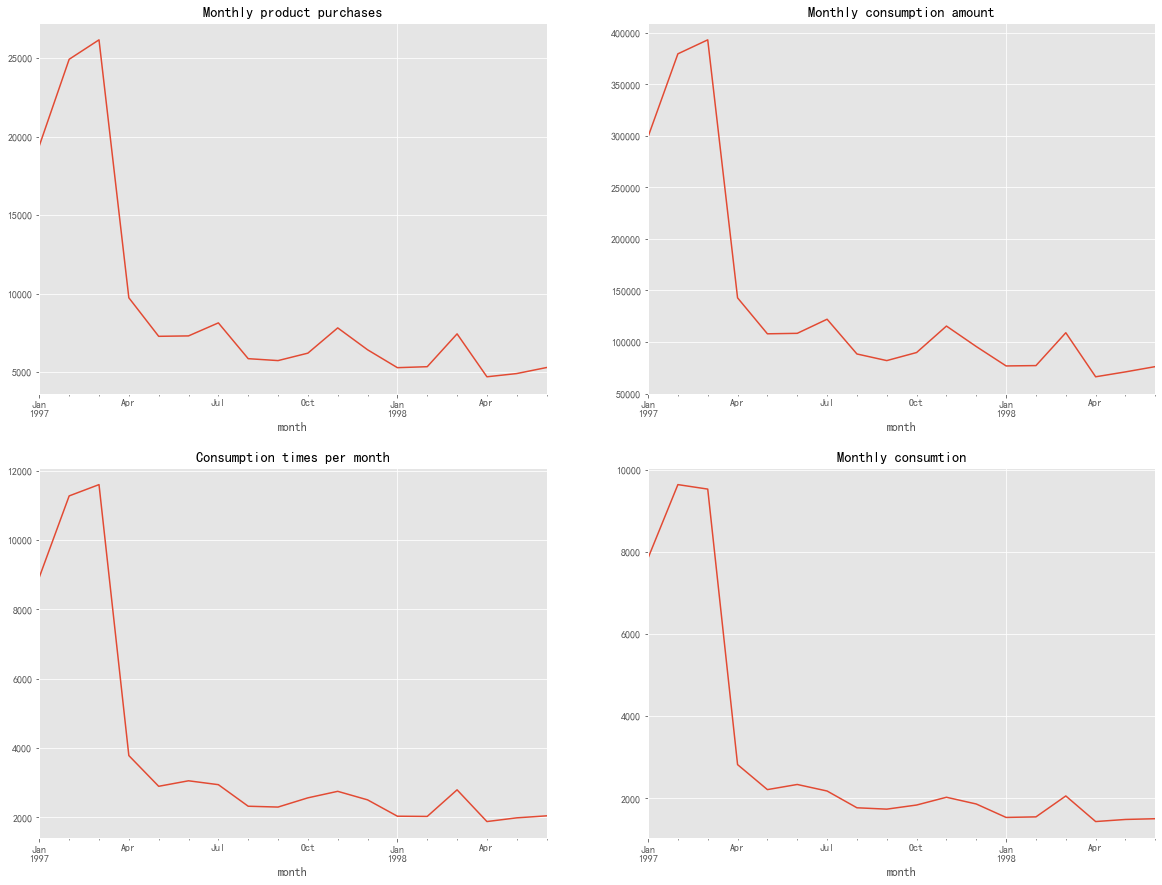

In [14]:
plt.figure(figsize=(20,15))
# Monthly product purchases
plt.subplot(221)
df.groupby(by='month')['order_products'].sum().plot()
plt.title('Monthly product purchases')
# Monthly consumption amount
plt.subplot(222)
df.groupby(by='month')['order_amount'].sum().plot()
plt.title('Monthly consumption amount')
# Consumption times per month
plt.subplot(223)
df.groupby(by='month')['user_id'].count().plot()
plt.title('Consumption times per month')
# Monthly consumtion
plt.subplot(224)
df.groupby(by='month')['user_id'].apply(lambda x :len(x.drop_duplicates())).plot()
plt.title('Monthly consumtion')

#### Conclusion:
In the first three months of 1997, the consumption situation was abnormal, and the follow-up tended to be normalized

## 2. User individual consumption analysis

In [17]:
#User consumption amount, consumption times (number of products) descriptive statistics
user_grouped = df.groupby(by='user_id').sum()
print(user_grouped.describe())
print(len(user_grouped))

           order_dt  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000
23570


<AxesSubplot:xlabel='order_products', ylabel='order_amount'>

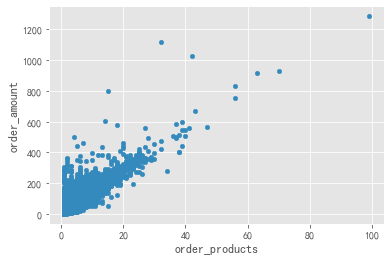

In [18]:
# scatter plot of product purchases and consumption amounts
df.plot(kind = 'scatter',x='order_products',y='order_amount')


## 3. consumption distribution of users

<AxesSubplot:xlabel='Purchase quantity per user', ylabel='Frequency'>

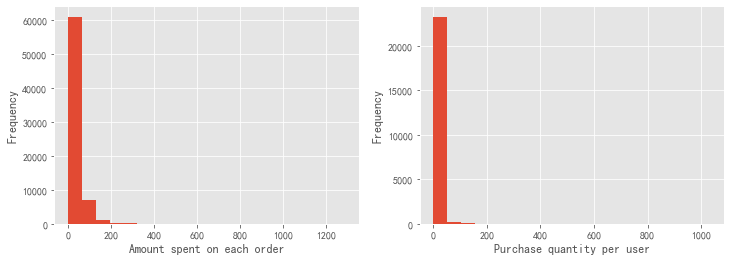

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.xlabel('Amount spent on each order')
df['order_amount'].plot(kind='hist',bins = 20)

plt.subplot(122)
plt.xlabel('Purchase quantity per user')
df.groupby(by='user_id')['order_products'].sum().plot(kind='hist',bins=20)

## 4. Analysis of the proportion of users’ cumulative consumption amount 
(user’s contribution)

In [22]:
user_cumsum = df.groupby(by='user_id')['order_amount'].sum().sort_values().reset_index()
user_cumsum

,user_id,order_amount
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [23]:
# Cumulative consumption amount of each user
user_cumsum['amount_cumsum'] = user_cumsum['order_amount'].cumsum()
user_cumsum

,user_id,order_amount,amount_cumsum
0,10175,0.00,0.00
1,4559,0.00,0.00
2,1948,0.00,0.00
3,925,0.00,0.00
4,10798,0.00,0.00
...,...,...,...
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70


In [26]:
amount_total = user_cumsum['amount_cumsum'].max()
user_cumsum['prop'] = user_cumsum.apply(lambda x:x['amount_cumsum']/amount_total,axis = 1)
user_cumsum

,user_id,order_amount,amount_cumsum,prop
0,10175,0.00,0.00,0.000000
1,4559,0.00,0.00,0.000000
2,1948,0.00,0.00,0.000000
3,925,0.00,0.00,0.000000
4,10798,0.00,0.00,0.000000
...,...,...,...,...
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404


<AxesSubplot:>

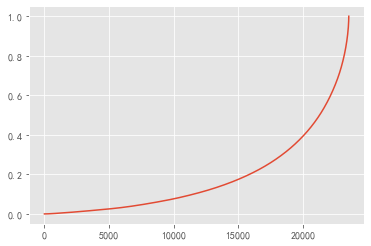

In [27]:
# User Contribution
user_cumsum['prop'].plot()

Conclusion：As can be seen from the figure, the top 2000 users contributed 40% of the amount, and the remaining 3500 users contributed 60%

## 5. Consumption behaviour of users

<AxesSubplot:>

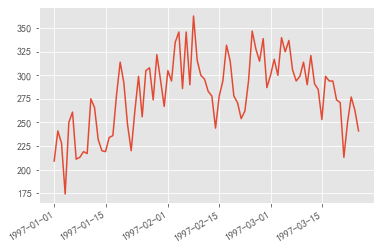

In [ ]:
# time of first purchase
df.groupby(by='user_id')['order_date'].min().value_counts().plot()

 The number of users who purchased for the first time showed an obvious upward trend from January 1st to February 10th, and then gradually began to decline. 
 
 Guess: It may be the company's product promotion efforts or price adjustments

<AxesSubplot:>

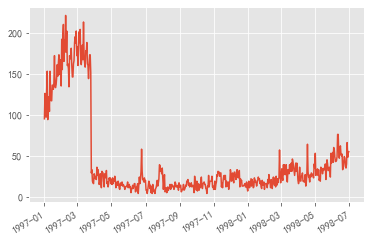

In [29]:
# time of last purchase
df.groupby(by='user_id')['order_date'].max().value_counts().plot()


Most users' last purchase time is concentrated in the first 3 months, indicating a lack of loyal users

Over time, the number of users who purchased goods for the last time has shown an upward trend. It is guessed that the data selected are the tracking records of users who spent the first three months in the next 18 months.

## 6. User stratification

### 6.1 RFM model (Recency, Frequency, Monetary)

In [30]:
# pivot table
rfm = df.pivot_table(index='user_id',values=['order_products','order_amount','order_date'],
                     aggfunc={
                         'order_date':'max',
                         'order_products':'sum',
                         'order_amount':'sum'})
rfm.head()

,order_amount,order_date,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [34]:
# Recency Frequency Monetary
rfm['R'] = -(rfm['order_date']-rfm['order_date'].max())/np.timedelta64(1,'D')
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace=True)
rfm.head()

,M,order_date,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [43]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x>=1 else '0')
    label = level['R'] + level['F'] + level['M']
    d = {
    '111':'重要价值客户',
    '011':'重要保持客户',
    '101':'重要发展客户',
    '001':'重要挽留客户',
    '110':'一般价值客户',
    '010':'一般保持客户',
    '100':'一般发展客户',
    '000':'一般挽留客户'}
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis = 1)
rfm.head()

,M,order_date,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,6,534.0,一般发展客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般挽留客户
5,385.61,1998-01-03,29,178.0,重要保持客户


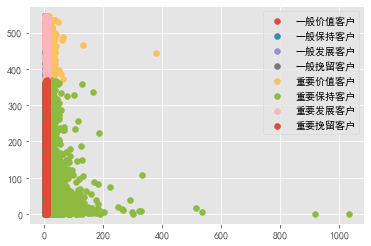

In [46]:
# visualization
for label,grouped in rfm.groupby(by='label'):
    # print(label,grouped)
    x = grouped['F']
    y = grouped['R']
    plt.scatter(x,y,label=label)
plt.legend() # show legend

### 6.2 Analysis of new and old users, active users and returning users

In [48]:
pivoted_counts = df.pivot_table(index='user_id',columns='month',values='order_dt',
                               aggfunc = 'count').fillna(0)
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Use 0,1 to indicate whether it has been consumed
df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [50]:
#Determine what type of user
def active_status(data):
    status = []
    for i in range(18):
        if data[i] == 0:
            if len(status) == 0:
                status.append('unreg')
            else:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status,df_purchase.columns)
purchase_status = df_purchase.apply(active_status,axis = 1)
purchase_status

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


<AxesSubplot:xlabel='month'>

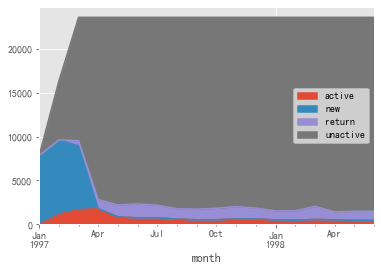

In [56]:
 # use Nan replace unreg
purchase_status_ct = purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_ct.T.fillna(0).plot.area()

## 7. User's purchase cycle

In [57]:
data1 = pd.DataFrame({
    'a':[0,1,2,3,4,5],
    'b':[5,4,3,2,1,0]})
data1.shift(axis=0)

,a,b
0,NaN,NaN
1,0.0,5.0
2,1.0,4.0
3,2.0,3.0
4,3.0,2.0
5,4.0,1.0


In [58]:
# Time difference between purchase date
order_diff = df.groupby(by = 'user_id').apply(lambda x:x['order_date']-x['order_date'].shift())
order_diff.describe()

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_date, dtype: object

Text(0, 0.5, 'quantity')

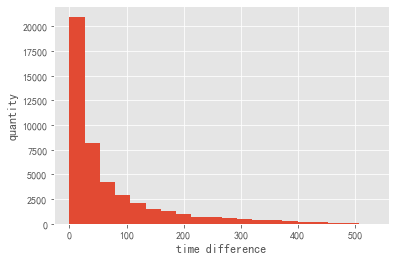

In [62]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20)
plt.xlabel('time difference')
plt.ylabel('quantity')

##### Conclusion:
##### Showing a typical long-tail distribution, only a small number of users have a consumption cycle of more than 200 days. 
##### You can make a phone call or give coupons and other activities after 3 days of consumption to increase the frequency of consumption.


## 8. User's life cycle

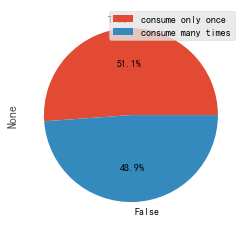

In [66]:
user_life = df.groupby('user_id')['order_date'].agg(['min','max'])
(user_life['max']==user_life['min']).value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(['consume only once','consume many times'])

In [67]:
(user_life['max']-user_life['min']).describe() 

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object

Text(0, 0.5, 'number of users')

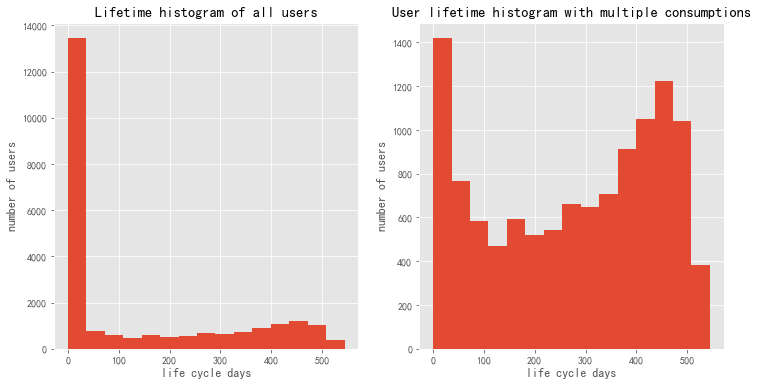

In [75]:
# visualization
plt.figure(figsize=(12,6))
plt.subplot(121)
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins=15)
plt.title('Lifetime histogram of all users')
plt.xlabel('life cycle days')
plt.ylabel('number of users')
plt.subplot(122)

u_1 = (user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,'D')
u_1[u_1>0].hist(bins=15)
plt.title('User lifetime histogram with multiple consumptions')
plt.xlabel('life cycle days')
plt.ylabel('number of users')

##### Conclusion:
##### 1.The average user life cycle is 34 days, but the median is 0, which proves that most users consume once and are low-quality users
##### 2.Users after the 75% quantile, whose life cycle is greater than 294 days, are core users and need to focus on maintaining
##### 3.This is the new user data for the first three months, it needs to be noted

## 9. User repurchase rate 

In [77]:
purchase_r = pivoted_counts.applymap(lambda x:1 if x >1 else np.NaN if x==0 else 0)
purchase_r.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='month'>

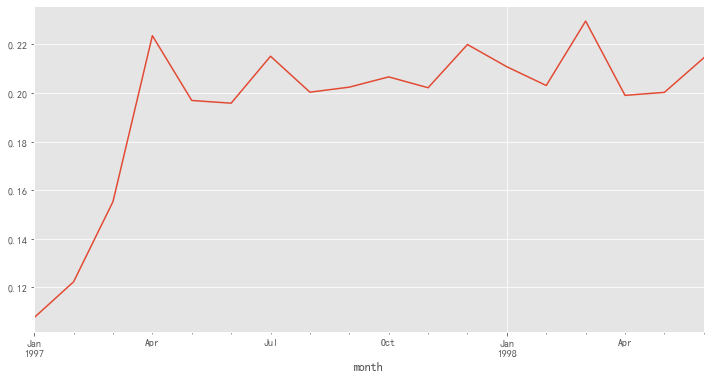

In [79]:
(purchase_r.sum()/purchase_r.count()).plot(figsize = (12,6))